# Titanic Survival with DNN

Supervised Learning. Binary classification

Predict survival on the Titanic using an artificial neural network in Keras

This project is based on a dataset containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. A description of this dataset is on the [Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper

np.random.seed(0)
sns.set()

## 1. Data Processing and Exploratory Data Analysis

In [2]:
data_path = 'data/titanic_data.csv'
target = ['Survived']  # the target will remain the same throughout the notebook

df_original = pd.read_csv(data_path)
print("{} rows \n{} columns \ntarget: {}".format(*df_original.shape, target))

891 rows 
12 columns 
target: ['Survived']


### Show original data

In [3]:
df_original.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Numerical Data

In [4]:
df_original.describe(percentiles=[0.5])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Non-numerical Data

In [5]:
df_original.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Compton, Miss. Sara Rebecca",male,CA. 2343,G6,S
freq,1,577,7,4,644


#### Missing values

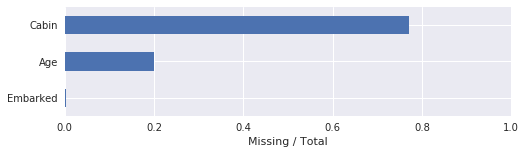

In [6]:
helper.missing(df_original)

- Binary target "Survived": ~38% ones; F1 score won't be used <br>
- Some values are missing for key values (e.g. Age)
- Some features (e.g. PassengerID, Name, Ticket) seem irelevant to survival probabilities <br> 

####  Target

In [30]:
df_original[target[0]].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

### Transform features

#### Enhance and add new features

In [19]:
df = df_original.copy()  # modified dataset


def enhance_features(df, inplace=False):
    """ Enhance dataframe df """

    if not inplace:
        df = df.copy()
        
    # filter Cabin to first letter
    df["Cabin"] = df["Cabin"].str[0]

    # get Title from Name
    df['Title'] = df["Name"].str.extract('([A-Za-z]+)\.', expand=False)

    # remove low frequency values for the new feautres
    fields = ['Cabin', 'Title']
    df.loc[:, fields] = helper.remove_lowfreq(df.loc[:, fields], show=False)

    # Alone passenger
    df['Alone'] = ((df["SibSp"] + df["Parch"]) == 0)
    
    if not inplace:
        return df


enhance_features(df, inplace=True)

Non-numerical fields changed to 'category' ['Cabin', 'Title']


#### Delete irrelevant features

In [21]:
def drop_irrelevant_features(df, inplace=False):
    """ Remove non-relevant columns from dataftame df (inplace) """
    
    if not inplace:
        df = df.copy()
        
    df.drop(['PassengerId', 'Name', 'Ticket'], axis='columns', inplace=True)

    if not inplace:
        return df

    
drop_irrelevant_features(df, inplace=True)

### Classify variables

Change categorical variables as dtype 'categorical' and sort columns: numerical + categorical + target

In [22]:
# numerical = list(df.select_dtypes(include=[np.number]))
df = helper.classify_data(df, target, numerical=["Age", "SibSp", "Parch", "Fare"])

pd.DataFrame(dict(df.dtypes), index=["Type"])[df.columns].head() # show data types

,Age,SibSp,Parch,Fare,Pclass,Sex,Cabin,Embarked,Title,Alone,Survived
Type,float32,float32,float32,float32,category,category,category,category,category,category,category


### Visualize the data

#### Categorical features

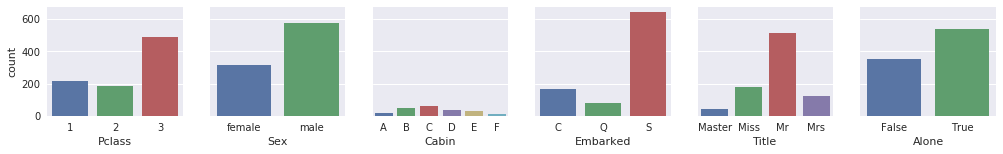

In [27]:
helper.show_categorical(df, target=target, sharey=True)

#### Target vs Categorical features

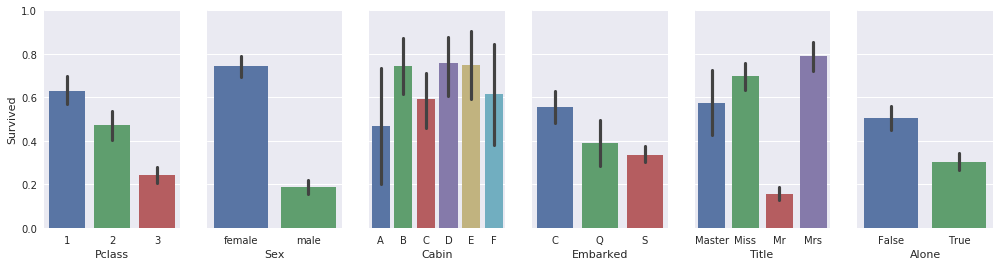

In [24]:
helper.show_target_vs_categorical(df, target)
plt.ylim([0, 1]);

#### Numerical features

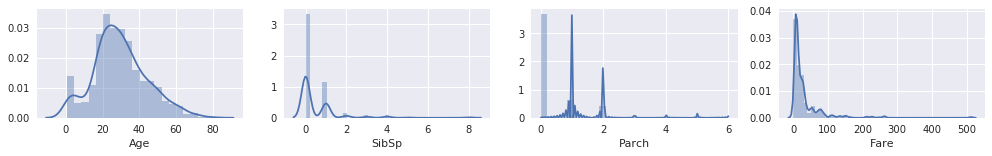

In [25]:
helper.show_numerical(df, kde=True)

#### Target vs numerical features

In [ ]:
helper.show_target_vs_numerical(df, target, jitter=0.2)
plt.ylim([-0.4, 1.4])
plt.yticks([0, 1]);
#df.groupby('Survived')['Age'].hist(alpha=0.4)
# helper.show_target_vs_numerical(df_3sigma, target, numerical, jitter=0.2)

#### Correlation between numerical features and target

In [ ]:
helper.show_correlation(df, target)

#### Most relevant features

In [ ]:
sns.FacetGrid(
    df, row="Sex", col="Pclass", hue="Survived", size=3, margin_titles=True).map(
        plt.hist, "Age", alpha=.7).add_legend()
plt.ylim([0, 70]);
# df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(
#     by='Survived', ascending=False)
# helper.show_target_vs_categorical(df.loc[(df['Age']<12) | (df['Sex']=='female')],
#                                   target, categorical)

-  Unlike in third class, most children and women in first and second classes survived.

### Fill missing values

In [ ]:
helper.missing(df)

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(data=df, x='Pclass', hue='Cabin');

In [ ]:
helper.show_target_vs_categorical(df, ['Age'], figsize=(17, 2))  # Age vs categorical

In [ ]:
def fill_missing_values(df, inplace=False):
    """ Fill missing values of the dataframe df """

    if not inplace:
        df = df.copy()

    # fill Embarked with mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # fill Cabin: the mode for grouped Pclass and Embarked  
    ref = df.groupby(['Pclass', 'Embarked'])['Cabin'].transform(lambda x: x.mode()[0])
    df['Cabin'].fillna(ref.iloc[0], inplace=True)
        
    # fill Age: the median for grouped Pclass and Title
    ref = df.groupby(['Pclass', 'Title'])['Age'].transform('median')
    df['Age'].fillna(ref, inplace=True)

    # fill Title: by age and sex only (not spouse or job)
    # df.loc[df['Title']=='Master','Age'].unique()
#     for idx, row in df.iterrows():
#         if (pd.isnull(row['Title'])):
#             if row['Age'] >= 13:
#                 if row['Sex'] == 'male':
#                     df.loc[idx, 'Title'] = "Mr"
#                 else:
#                     df.loc[idx, 'Title'] = "Mrs"
#             else:
#                 if row['Sex'] == 'male':
#                     df.loc[idx, 'Title'] = "Master"
#                 else:
#                     df.loc[idx, 'Title'] = "Miss"     
    
    # fill missing categorical values with the mode (if any)
    categorical = list(df.select_dtypes(include=['category']))
    modes = df[categorical].mode()  # this solves fillna issue with mode()
    for idx, f in enumerate(df[categorical]):
        df[f].fillna(modes.iloc[0, idx], inplace=True)

    # fill missing numeric NaN values with the median (if any)
    df.fillna(df.median(), inplace=True)

    if not inplace:
        return df


# bins = list(range(0,80,10))
# # bins = (0, 5, 10, 15, 20, 30, 40, 50, 60)
# labels = ["{}-{}".format(i, j) for i,j in zip(bins[:-1],bins[:-1])]
# df['Age_cat'] = pd.cut(df['Age'], bins, labels=labels).astype('category')
# df = df.drop(['Age'], axis='columns')

fill_missing_values(df, inplace=True)
copy_df = df.copy()  # save checkpoint

## 2. Neural Network model

### Select the features for the model

In [ ]:
drop_features = [] # features to drop

df = copy_df.copy() # Restore checkpoint

df.drop(drop_features, axis='columns', inplace=True)
# From now use data instead of df
data = df.copy()
data.head(3)

### Standardize numerical variables

Shift and scale the variables such that they have zero mean and a standard deviation of 1. The scaling factors are saved so we can go backwards when we use the network for predictions

In [ ]:
data, scale = helper.standardize(data)

### Create dummy features

In [ ]:
# features only; target should be encoded later
data, dummies = helper.create_dummy(data, target)

# ordered neural network features (with dummies)
nn_features = [f for f in data if f not in target]

data.head()

### Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split


def split(data, test_size=0.15):
    train, test = train_test_split(data, test_size=test_size, random_state=9)

    # Separate the data into features and target (x=features, y=target)
    x_train, y_train = train.drop(target, axis=1).values, train[target].values
    x_test, y_test = test.drop(target, axis=1).values, test[target].values
    # _nc: non-categorical yet (needs one-hot encoding)

    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = split(data, test_size=0.2)

### One-hot encode the output

In [ ]:
import keras
# helper.reproducible(seed=0)  # Setup reproducible results from run to run using Keras


def one_hot_output(y_train, y_test):
    num_classes = len(np.unique(y_train))
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return y_train, y_test


y_train, y_test = one_hot_output(y_train, y_test)

In [ ]:
print("train size \t X:{} \t Y:{}".format(x_train.shape, y_train.shape))
print("test size  \t X:{} \t Y:{} ".format(x_test.shape, y_test.shape))

### Build the Neural Network for Binary Classification

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout


def build_nn(input_size, output_size, summary=False):

    input_nodes = input_size
    weights = keras.initializers.RandomNormal(stddev=0.001)
    leaky_relu = keras.layers.advanced_activations.LeakyReLU(alpha=0.01)


    model = Sequential()
    model.add(
        Dense(
            input_nodes,
            input_dim=input_size,
            kernel_initializer=weights,
            bias_initializer='zero'))
    model.add(leaky_relu)

    
    model.add(Dropout(.2))

    model.add(
        Dense(
            output_size,
            activation='softmax',
            kernel_initializer=weights,
            bias_initializer='zero'))

    if summary:
        model.summary()

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


model = build_nn(x_train.shape[1], y_train.shape[1], summary=True)

### Train the Neural Network

In [ ]:
from time import time
model_path = os.path.join("models", "titanic.h5")


def train_nn(model, x_train, y_train, validation_data=None, path=False, show=True):
    """ 
    Train the neural network model. If no validation_datais provided, a split for validation
    will be used
    """
    
    if show:
        print('Training ....')
    
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0)]
    t0 = time()

    history = model.fit(
        x_train,
        y_train,
        epochs=1000,
        batch_size=64,
        verbose=0,
        validation_split=0.25,
        validation_data = validation_data,
        callbacks=callbacks)

    if show:
        print("time: \t {:.1f} s".format(time() - t0))
        helper.show_training(history)

    if path:
        model.save(path)
        print("\nModel saved at", path)
    
    return history
        

model = None
model = build_nn(x_train.shape[1], y_train.shape[1], summary=False)
train_nn(model, x_train, y_train, path=model_path);

### Train with Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold


def cv_train_nn(x_train, y_train, n_splits):
    """ Create and Train models for cross validation. Return best model """
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

    score = []

    best_model = None
    best_acc = 0

    print('Training {} models for Cross Validation ...'.format(n_splits))

    for train, val in skf.split(x_train[:,0], y_train[:,0]):     
        model = None
        model = build_nn(x_train.shape[1], y_train.shape[1], summary=False)
        history = train_nn(
            model,
            x_train[train], y_train[train], show=False, 
            validation_data=(x_train[val], y_train[val]))

        val_acc = history.history['val_acc'][-1]

        score.append(val_acc )

        if val_acc > best_acc:  # save best model (fold) for evaluation and predictions
            best_model = model
            best_acc = val_acc

    model = best_model    
    print('\nCross Validation accuracy: {:.3f}'.format(np.mean(score)))
    
    return best_model


model = cv_train_nn(x_train, y_train, 4)

### Evaluate the model

In [ ]:
def evaluate_nn(model, x_test, y_test):
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test Accuracy: {:.3f}".format(score[1]))


#model = keras.models.load_model(model_path)
evaluate_nn(model, x_test, y_test)

### Make predictions

In [ ]:
def predict_manual(new_df):
    """
    input: custom dataframe 
    """
    
    new_data = new_df.copy()
    
    # force data types to previous dataframe df 
    for col in list(new_data):
        new_data[col] = new_data[col].astype(df.dtypes[col])
    
    # standardize numerical variables
    new_data, _ = helper.standardize(new_data, scale)
    
    # replace categorical features by dummy variables (using existing dummies)
    new_data, _ = helper.create_dummy(new_data, target, dummies)

    # sort columns to match with manual entries
    new_data = new_data[nn_features] ## nn_features: sorted list used in the NN model

    # make predictions
    prediction = model.predict(new_data.values)[:, 1]
    return (prediction)


#     for index, row in new_data.iterrows():
#         single_pred = model.predict(np.array([row]))
#         print('{}:\t {:.0f}%'.format(index,single_pred[0,1] * 100))

In [ ]:
# input data format
df.describe()

In [ ]:
df.describe(include=['category'])

In [ ]:
print(list(df))

In [ ]:
new_passengers = {
    'Average man':    [26, 1, 0, 14, 2, 'male',   'C', 'S', 'Mr', 0],
    'Average woman':  [26, 1, 0, 14, 2, 'female', 'C', 'S', 'Mrs', 0],
    'Alone woman 3c': [26, 0, 2, 8, 3, 'female',  'C', 'S', 'Miss', 1],
    'Boy 1c ':        [7, 0, 2, 31, 1, 'male',    'C', 'S', 'Master', 0],
    'Boy 2c ':        [7, 0, 2, 14, 2, 'male',    'C', 'S', 'Master', 0],
    'Boy 3c ':        [7, 0, 2, 8, 3, 'male',     'C', 'S', 'Master', 0],
}

# create a dataframe with the new data
new_df = pd.DataFrame(
    data=list(new_passengers.values()),
    index=new_passengers.keys(),
    columns= [f for f in list(df) if f not in target])

prediction = predict_manual(new_df)
new_df['Survival prob. (%)'] = (prediction * 100).astype(int)
new_df

The results predicted from the model confirm the impact of the sex for the survival probabilities, as well as the class for the survival of women and children.

### Compare with non-enhanced features

In [ ]:
# Same dataset without:
#   enhancing features
#   adding new features
#   filling missing values using grouped median

def non_enhanced_pipeline(df):
    
    df = df.copy()

    # select features & classify features
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)
    df = helper.classify_data(df, target, numerical=["Age", "SibSp", "Parch", "Fare"])

    # fill NaN
    df.fillna(df.median(), inplace=True)

    # standardize and create dummies
    data, _ = helper.standardize(df)
    data, _ = helper.create_dummy(data, target)

    # split and one-hot output
    x_train, y_train, x_test, y_test = split(data, test_size=0.15)
    y_train, y_test = one_hot_output(y_train, y_test)

    # build, train and evaluate model
    model = build_nn(x_train.shape[1], y_train.shape[1], summary=False)
    train_nn(model, x_train, y_train, path=False, show=False)
    evaluate_nn(model, x_test, y_test)

    
non_enhanced_pipeline(df_original)    

### Compare removing outliers

In [ ]:
def remove_outliers_peline(df):

    df = df.copy()

    # transform features
    enhance_features(df, inplace=True)

    # select features & classify features
    df.drop(['PassengerId', 'Name', 'Ticket'], axis='columns', inplace=True)
    df = helper.classify_data(df, target, numerical=["Age", "SibSp", "Parch", "Fare"])

    # remove outliers
    helper.remove_outliers(df, inplace=True)  # remove default values above 3 times std

    # fill missing values (enhanced)
    fill_missing_values(df, inplace=True)

    # standardize and create dummies
    data, _ = helper.standardize(df)
    data, _ = helper.create_dummy(data, target)

    # split and one-hot output
    x_train, y_train, x_test, y_test = split(data, test_size=0.15)
    y_train, y_test = one_hot_output(y_train, y_test)

    # build, train and evaluate model
    model = build_nn(x_train.shape[1], y_train.shape[1], summary=False)
    train_nn(model, x_train, y_train, path=False, show=False)
    evaluate_nn(model, x_test, y_test)


remove_outliers_peline(df_original)

### Compare with non-neural network models

#### XGBoost

In [ ]:
helper.XGBClassifier(
    x_train, y_train, x_test, y_test, max_depth=4, n_estimators=400, learning_rate=0.1)

#### Classical Machine Learning

In [ ]:
# enhanced features
helper.ml_classification(x_train, y_train, x_test, y_test)